# Pandas Toolkit for Data Analytics

## Overview

This notebook contains a collection of various examples using Pandas for data collection and manipulation. 

The homepage for Pandas can be found at: 
https://pandas.pydata.org

Many of the examples in this toolkit come from various Data School videos:
https://www.dataschool.io  
  
Additional references and examples come from the *Python Data Science Handbook* by Jake VanderPlas  
https://github.com/jakevdp/PythonDataScienceHandbook  

Have Fun!!!

* [Setup and Datasets](#setup_and_datasets)  
* [Numpy Arrays and Basic Pandas Objects](#numpy_arrays_and_basic_pandas_objects)  
* [Reading and Writing Data](#reading_and_writing_data)  
* [Working with Rows and Columns](#working_with_rows_and_columns)  
* [Filters and Sorting](#filters_and_sorting)  
* [Indexing](#indexing)  
* [Concat and Append](#concat_append)  
* [Merge and Join](#merge_join)  
* [Aggregation and Grouping](#aggregate_group)  
* [Working with Dates and Times](#dates_and_times)  
* [Python Data Structures for Data Analysis](#python_data_structures)
* [Special Features](#special_features)  
    + [Element-wise Data Operations](#data_operations)  

<a id='setup_and_datasets'></a>
## Setup and Datasets
This next section will set up the libraries used throughout the notebook, as well as, introduce the various datasets used in the examples.

In [3]:
# import the main libraries to be used
import numpy as np
import pandas as pd

# datasets
# There are various datasets used in the following examples. some of the datasets are accessed from the local
# files system, but some datasets are access online from the repository 
#
# Chipolet chip orders
chips = pd.read_table('http://bit.ly/chiporders')
print("The chip orders dataset looks like:")
print(chips.shape)
print(chips.head(2))
#
# UFO sightings
ufo = pd.read_csv('http://bit.ly/uforeports')
print("\nThe ufo reports dataset looks like:")
print(ufo.shape)
print(ufo.head(2))
#
# movie ratings from IMDB
movies = pd.read_csv('http://bit.ly/imdbratings')
print("\nThe movie ratings dataset looks like:")
print(movies.shape)
print(movies.head(2))
#
# alcohol consumption by country
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
print("\nThe alcohol consumption by country dataset looks like:")
print(drinks.shape)
print(drinks.head(2))

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # Remove the CWD from sys.path while we load stuff.


The chip orders dataset looks like:
(4622, 5)
   order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   
1         1         1                          Izze       [Clementine]   

  item_price  
0     $2.39   
1     $3.39   

The ufo reports dataset looks like:
(18241, 5)
          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00

The movie ratings dataset looks like:
(979, 6)
   star_rating                     title content_rating  genre  duration  \
0          9.3  The Shawshank Redemption              R  Crime       142   
1          9.2             The Godfather              R  Crime       175   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'Jame

<a id='numpy_arrays_and_basic_pandas_objects'></a>
## NumPy Arrays and Basic Pandas Objects
A separate notebook was created to provide numerous examples on the basic Python data structures of NumPy arrays
and Pandas objects.

See [PythonDataStructures](PythonDataStructures.ipynb)

The examples are from the excellent reference site by Jake VanderPlas for the "Python Data Science Handbook"
https://github.com/jakevdp/PythonDataScienceHandbook

<a id='reading_and_writing_data'></a>
## Reading and Writing Data
A separate notebook was created earlier that provides numerous examples on reading and writing data with Python.

See [ReadingWritingData](ReadingWritingData.ipynb)

<a id='working_with_rows_and_columns'></a>
## Working with Rows and Columns
This section include basic mechanics for working with data by rows or columns in a Pandas DataFrame or Series.

In [112]:
# each column of a pandas dataframe is a series
# using bracket notation
print(ufo['City'].head(2))
print(type(ufo['City']))
#
# using dot notation
# only works if there are no spaces in the attribute (column) name, otherwise use bracket notation
# also only works if there is no conflict with a built-in attribute name
print(ufo.City.head(2)) 
print(type(ufo.City))
#


0         Ithaca
1    Willingboro
Name: City, dtype: object
<class 'pandas.core.series.Series'>
0         Ithaca
1    Willingboro
Name: City, dtype: object
<class 'pandas.core.series.Series'>


In [113]:
# renaming columns
print(ufo.columns) # list the column names
#
# remove the spaces from the column names
ufo.rename(columns = {'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
print(ufo.columns)
#
# change multiple column names at once
ufo_cols = ['city', 'colors reported', 'share reported', 'state', 'time']
ufo.columns = ufo_cols
print(ufo.columns)
#
# change column names on data read
ufo = pd.read_csv('http://bit.ly/uforeports', names=ufo_cols, header=0) # header = 0th row
print(ufo.head(2))
#
# change names on a multitude of column names at once
ufo.columns = ufo.columns.str.replace(' ', '_')
print(ufo.columns)

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')
Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')
Index(['city', 'colors reported', 'share reported', 'state', 'time'], dtype='object')
          city colors reported share reported state             time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
Index(['city', 'colors_reported', 'share_reported', 'state', 'time'], dtype='object')


In [114]:
# deleting columns
# single column
ufo.drop('colors_reported', axis=1, inplace=True) # axis: 0=rows, 1=cols
print(ufo.head(2))
#
# multiple columns
ufo.drop(['city', 'state'], axis=1, inplace=True)
print(ufo.head(2))
#
# using conditions to delete columns
df = pd.DataFrame({"A1": [1,2,3],
                   "B2": [2,4,8],
                   "C2": [5,5,5]})
cols_to_drop = [cname for cname in df.columns if cname.endswith("2")]
df = df.drop(cols_to_drop, axis=1)
print(df)
#
# selecting what columns to keep and delete everything else
df = pd.DataFrame({"A1": [1,2,3],
                   "B2": [2,4,8],
                   "C2": [5,5,5]})
cols_to_keep = [cname for cname in df.columns if cname.endswith("2")]
df = df[cols_to_keep]
print(df)

          city share_reported state             time
0       Ithaca       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro          OTHER    NJ  6/30/1930 20:00
  share_reported             time
0       TRIANGLE   6/1/1930 22:00
1          OTHER  6/30/1930 20:00
   A1
0   1
1   2
2   3
   B2  C2
0   2   5
1   4   5
2   8   5


In [115]:
# deleting rows
ufo.drop([0,1], axis=0, inplace=True) # list the index values/names, axis=0 is default
print(ufo.head(2))

  share_reported             time
2           OVAL  2/15/1931 14:00
3           DISK   6/1/1931 13:00


In [116]:
# adding columns
# three basic approaches - bracket indexing, loc, and assign
#
df = pd.DataFrame({"A": [1,2,3],
                   "B": [2,4,8]})
#
df["C"] = [1,2,3]         # explicit bracket notation for the new column, this modifies the original dataframe
print(df)
df.loc[:, "D"] = [1,2,3]  # use loc to do the same explicit column addition, this modifies the original dataframe
print(df)
df_new = df.assign(E=[1,2,3]) # returns a new dataframe with the new column added, the original is NOT modified
print(df)
print(df_new)
#
# adding a new column based on an existing column
df_newer = df_new.assign(F=lambda idf: idf["B"] * 2)
print(df_newer)

   A  B  C
0  1  2  1
1  2  4  2
2  3  8  3
   A  B  C  D
0  1  2  1  1
1  2  4  2  2
2  3  8  3  3
   A  B  C  D
0  1  2  1  1
1  2  4  2  2
2  3  8  3  3
   A  B  C  D  E
0  1  2  1  1  1
1  2  4  2  2  2
2  3  8  3  3  3
   A  B  C  D  E   F
0  1  2  1  1  1   4
1  2  4  2  2  2   8
2  3  8  3  3  3  16


In [117]:
# inserting columns
df = pd.DataFrame({"A": [1,2,3],
                   "B": [2,4,8]})
df.insert(loc=1, column="C", value=[1,2,3])
print(df)

   A  C  B
0  1  1  2
1  2  2  4
2  3  3  8


In [33]:
# changing the type of the data in a column
print(drinks.dtypes)
drinks2 = pd.DataFrame()
drinks2['beer_servings'] = drinks.beer_servings.astype(float)
print(drinks2.dtypes)
#
# can change the datat type when reading in the data as well
drinks2 = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float})
print(drinks2.dtypes)

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object
beer_servings    float64
dtype: object
country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


<a id='filters_and_sorting'></a>
## Filters and Sorting
How to sort a DataFrame or Series and apply filters

In [118]:
# performing a sort
# single column (Series) in dot notation
print(movies.title.sort_values().head())
#
# single column (Series) in bracket notation
print(movies['title'].sort_values().head())
print(movies['title'].sort_values(ascending=False).head())
#
# whole dataframe by a single column (Series)
print(movies.sort_values('duration').head())
#
# whole dataframe by multiple columns
print(movies.sort_values(['content_rating','duration']).head(5)) # sorts by first list element, then second, then...

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object
542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object
864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object
     star_rating                        title content_rating    genre  \
389          8.0                       Freaks        UNRATED    Drama   
338          8.0          Battleship Potemkin        UNRATED  History   
258          8.1  The Cabinet of Dr. Caligari        UNRATED    Crime   
293          8.1                    Duck Soup         PASSED   Comedy   
88           8.4                      The Kid      NOT RATED   Comedy   

     duration                                        actors_list  
389

In [119]:
# filtering dataframe rows by column
# only rows with duration > 200
print(movies[movies.duration >= 200].head(5))
#
# extracting one or more columns of filtered rows
# dot notation
print(movies[movies.duration >= 200].genre.head(5))
#
# bracket notation - single column
print(movies[movies.duration >= 200]['genre'].head(5))
#
# bracket notation - multiple columns
print(movies.loc[movies.duration >= 200,['genre', 'duration']].head(5))
#
# multiple filter criteria - use of 'and' (&) and 'or' (|)
print(movies[(movies.duration >= 200) & (movies.genre == 'Drama')].head(5))
#
print(movies[(movies.duration >= 200) | (movies.genre == 'Drama')].head(5))
#
# multiple 'or' filters - a different approach
print(movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(5))

    star_rating                                          title content_rating  \
2           9.1                         The Godfather: Part II              R   
7           8.9  The Lord of the Rings: The Return of the King          PG-13   
17          8.7                                  Seven Samurai        UNRATED   
78          8.4                    Once Upon a Time in America              R   
85          8.4                             Lawrence of Arabia             PG   

        genre  duration                                        actors_list  
2       Crime       200  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
7   Adventure       201  [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...  
17      Drama       207  [u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...  
78      Crime       229  [u'Robert De Niro', u'James Woods', u'Elizabet...  
85  Adventure       216  [u"Peter O'Toole", u'Alec Guinness', u'Anthony...  
2         Crime
7     Adventure
17        Drama
78 

<a id='indexing'></a>
## Indexing
This section shows examples related to accessing specific 'slices' or 'locations' of pandas dataframes.  
  
Here is additional reference information from the Python Data Sceince Handbook by Jake VanderPlas  
[Data Indexing and Selection](PythonDataScienceHandbook/03.02-Data-Indexing-and-Selection.ipynb)

In [120]:
# using loc - selecting rows and columns by label
#
# UFO sightings
ufo = pd.read_csv('http://bit.ly/uforeports')

print(ufo.loc[0,:]) # row zero, all columns
#
print(ufo.loc[0:2, :]) # rows 0-2 inclusive, all columns
#
print(ufo.loc[:, 'City'].head(5)) # all rows, 'City' column
#
print(ufo.loc[:, ['City', 'State']].head(5)) # all rows, 'City' and 'State' columns
#
print(ufo.loc[:, 'City':'State'].head(5)) # all rows, columns 'City' through 'State'
#
# loc with boolean conditions
print(ufo.loc[ufo.City=='Oakland', :].head(5)) # all rows where city==oakland, all columns
#
print(ufo.loc[ufo.City=='Oakland', 'State'].head(5)) # all rows where city==oakland, only the 'State' column
#
print(ufo.loc[ufo.City=='Oakland', ['State','Time']].head(5)) # rows where city==oakland, 'State' and 'Time' column

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object
          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00
0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object
                   City State
0                Ithaca    NY
1           Willingboro    NJ
2               Holyoke    CO
3               Abilene    KS
4  New York Worlds Fair    NY
                   City Colors Reported Shape Reported State
0                Ithaca             NaN       TRIANGLE    NY
1           Willingboro             NaN          OTHER    NJ
2           

In [121]:
# using iloc - selection by integer position

print(ufo.iloc[:, [0,3]].head(5))  # all rows, columns at position 0 and 3
#
print(ufo.iloc[:, 0:4].head(5))  # all rows, columns at position 0-4, exclusive (means only 0-3 selected)
#
print(ufo.iloc[0:3, :]) # rows 0-3 exclusive (means only 0-2), and all columns

                   City State
0                Ithaca    NY
1           Willingboro    NJ
2               Holyoke    CO
3               Abilene    KS
4  New York Worlds Fair    NY
                   City Colors Reported Shape Reported State
0                Ithaca             NaN       TRIANGLE    NY
1           Willingboro             NaN          OTHER    NJ
2               Holyoke             NaN           OVAL    CO
3               Abilene             NaN           DISK    KS
4  New York Worlds Fair             NaN          LIGHT    NY
          City Colors Reported Shape Reported State             Time
0       Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1  Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2      Holyoke             NaN           OVAL    CO  2/15/1931 14:00


In [122]:
# using ix - selection by mix of labels and integer position (ix IS BEING DEPRECATED!)
# instead use loc and iloc and positional indexing and label indexing

# mixed label and integer position - multiple rows, single column
print(drinks.loc[drinks.index[[0,1]], 'beer_servings']) # row labels by position (0-1 inclusive), column by label
print(drinks.iloc[0:2, drinks.columns.get_loc('beer_servings')]) # row positions, column by position by label
#
# mixed label and integer position - multiple rows, multiple columns
print(drinks.loc[drinks.index[[0,1]], ['beer_servings', 'spirit_servings']]) # row labels by position (0-1 inclusive), column by label
print(drinks.iloc[0:2, [drinks.columns.get_loc(c) for c in ['beer_servings','spirit_servings']]]) # row positions, column by position by label

0     0
1    89
Name: beer_servings, dtype: int64
0     0
1    89
Name: beer_servings, dtype: int64
   beer_servings  spirit_servings
0              0                0
1             89              132
   beer_servings  spirit_servings
0              0                0
1             89              132


<a id='concat_append'></a>
## Concat and Append  
Pandas provides powerful operations for combining datasets by concatenating Series or DataFrames.

In [3]:
# concatenating two columns using simple operations
#
# UFO sightings
ufo = pd.read_csv('http://bit.ly/uforeports')

# if strings, then you get the following
print((ufo.City + ufo.State).head(2)) 
# if numbers, then the columns are added together
print((chips.order_id + chips.quantity).head(2)) 

0         IthacaNY
1    WillingboroNJ
dtype: object
0    2
1    2
dtype: int64


Here is additional reference information from the Python Data Science Handbook by Jake VanderPlas  
[Concat and Append](PythonDataScienceHandbook/03.06-Concat-And-Append.ipynb)

<a id='merge_join'></a>
## Merge and Join 
In addition to concatinating and appending datasets, Pandas also supports more sophisticated merge and join operations.  
Here is additional reference information from the Python Data Science Handbook by Jake VaderPlas  
[Merge and Join](PythonDataScienceHandbook/03.07-Merge-and-Join.ipynb)

<a id='aggregate_group'></a>  
## Aggregation and Grouping  
Pandas supports the ability to perform summarization of large datasets by using computing aggregations like sum(), mean(), median(), min(), and max().  
More sophisticated aggregations, including multiple layers of aggregations within a dataset, can be performed by grouping using groupby where you can perform split-apply-combine operations on a dataset.

In [4]:
# and example of aggregation and grouping

# use the drinks by country dataset
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

print(drinks.head())

       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa  


In [5]:
# what is the average beer servings across all continents?
print(drinks.beer_servings.mean())

106.16062176165804


In [7]:
# what is the average beer servings by continent?
print(drinks.groupby('continent').beer_servings.mean())

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64


In [8]:
# what is the number, min, max, and average number of beer servings by continent?
print(drinks.groupby('continent').beer_servings.agg(['count','min','max','mean']))

               count  min  max        mean
continent                                 
Africa            53    0  376   61.471698
Asia              44    0  247   37.045455
Europe            45    0  361  193.777778
North America     23    1  285  145.434783
Oceania           16    0  306   89.687500
South America     12   93  333  175.083333


In [9]:
# what is the average of all alcohol servings by continent?
print(drinks.groupby('continent').mean())

               beer_servings  spirit_servings  wine_servings  \
continent                                                      
Africa             61.471698        16.339623      16.264151   
Asia               37.045455        60.840909       9.068182   
Europe            193.777778       132.555556     142.222222   
North America     145.434783       165.739130      24.521739   
Oceania            89.687500        58.437500      35.625000   
South America     175.083333       114.750000      62.416667   

               total_litres_of_pure_alcohol  
continent                                    
Africa                             3.007547  
Asia                               2.170455  
Europe                             8.617778  
North America                      5.995652  
Oceania                            3.381250  
South America                      6.308333  


In [11]:
# what is the average beer servings by country by continent?
print(drinks.groupby(['continent','country']).beer_servings.mean())

continent      country                 
Africa         Algeria                      25
               Angola                      217
               Benin                        34
               Botswana                    173
               Burkina Faso                 25
               Burundi                      88
               Cabo Verde                  144
               Cameroon                    147
               Central African Republic     17
               Chad                         15
               Comoros                       1
               Congo                        76
               Cote d'Ivoire                37
               DR Congo                     32
               Djibouti                     15
               Egypt                         6
               Equatorial Guinea            92
               Eritrea                      18
               Ethiopia                     20
               Gabon                       347
               Gambi

Here is additional reference information from the Python Data Science Handbook by Jake VanderPlas  
[Aggregation and Grouping](PythonDataScienceHandbook/03.08-Aggregation-and-Grouping.ipynb)

<a id='dates_and_times'></a>
## Dates and Times

This section describes basic capabilities when working with date and time values. 
  
https://pandas.pydata.org/docs/user_guide/timeseries.html  
  
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [6]:
print(ufo.head())
print(ufo.dtypes)

                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00
City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object


In [15]:
# convert date/time strings to datetime objects 
# can detect the day, month, year from the string and do the conversion correctly
ufo['Time'] = pd.to_datetime(ufo.Time)
print(ufo.head())
print(ufo.dtypes)

                   City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  
0 1930-06-01 22:00:00  
1 1930-06-30 20:00:00  
2 1931-02-15 14:00:00  
3 1931-06-01 13:00:00  
4 1933-04-18 19:00:00  
City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object


In [10]:
ufo.Time.dt.hour.head()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [14]:
ufo.Time.dt.weekday.head()

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.weekday.html

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [18]:
# create a timestamp to use in comparisons and time math
ts = pd.to_datetime('1/1/1999')
print(ts)

ufo.loc[ufo.Time >= ts, :].head()

1999-01-01 00:00:00


,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [21]:
print(ufo.Time.max())
print(ufo.Time.min())
print((ufo.Time.max() - ufo.Time.min()).days)

2000-12-31 23:59:00
1930-06-01 22:00:00
25781


In [23]:
ufo['Year'] = ufo.Time.dt.year
print(ufo.head())

                   City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  Year  
0 1930-06-01 22:00:00  1930  
1 1930-06-30 20:00:00  1930  
2 1931-02-15 14:00:00  1931  
3 1931-06-01 13:00:00  1931  
4 1933-04-18 19:00:00  1933  


In [24]:
# get a count of the number for each year, and then sort according to the Year (which is the index)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1971     118
1972     162
1973     227
1974     261
1975     312
1976     281
1977     258
1978     326
1979     237
1980     244
1981     175
1982     186
1983     148
1984     177
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

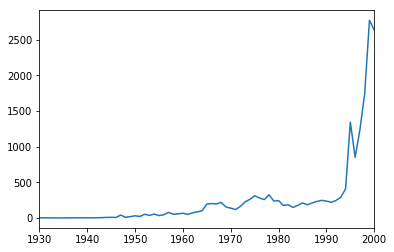

In [25]:
%matplotlib inline
ufo.Year.value_counts().sort_index().plot()

<a id='python_data_structures'></a>
## Python Data Structures for Data Analysis

### Overview
This notebook contains examples of basic Python data structures from the NumPy and Pandas libraries that are used frequently in data analysis. Many of the examples come from the excellent reference book by Jake VanderPlas called "Python Data Science Handbook". https://github.com/jakevdp/PythonDataScienceHandbook

### NumPy Arrays
Data manipulation in Python is nearly synonymous with NumPy array manipulation: even tools like Pandas are built around the NumPy array. This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.  

[The Basics of NumPy Arrays](PythonDataScienceHandbook/02.02-The-Basics-Of-NumPy-Arrays.ipynb)

### Pandas Objects - Series, DataFrame, and Index
At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.  
* Series - a one-dimensional array of indexed data, structured around a numpy array
* DataFrame - a two-dimensional array (matrix/table), structures as an ordered sequence of one-dimensional Series array columns
* Index - an immutable array used in Series and DataFrames  
  
[Introducing Pandas Objects](PythonDataScienceHandbook/03.01-Introducing-Pandas-Objects.ipynb)

#### Dataframe Index  
The dataframe index represents the "rows" of the dataframe and is an important construct that serves three primary purposes:  
* Identification - used to identify a particular row in the data frame  
* Selection - used to select values in the dataframe  
* Alignment - used to align data values between two or more series for concatinations, computations, etc.

In [48]:
drinks4index = pd.read_csv('http://bit.ly/drinksbycountry')
# identification
print(drinks4index.head())
print(drinks4index.index)
print(drinks4index.columns)
# the index and the columns are NOT part of the data
print(drinks4index.shape)
# the index values stay with their rows (they are immutable) when filtering so you can identify which row you are working with
print(drinks4index[drinks4index.continent=='South America'])

       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa  
RangeIndex(start=0, stop=193, step=1)
Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')
(193, 6)
       country  beer_servings  spirit_servings  wine_servings  \
6    Argentina            193               25            221   
20     Bolivia        

In [49]:
#selection
# pull out a specific data value by using the row (index) designation
print(drinks4index.loc[23, 'beer_servings']) # grabs Brazil data

245


In [50]:
# set the index to different, more meaningful, values
drinks4index.set_index('country', inplace=True)
print(drinks4index.head())
print(drinks4index.index)
print(drinks4index.shape)

             beer_servings  spirit_servings  wine_servings  \
country                                                      
Afghanistan              0                0              0   
Albania                 89              132             54   
Algeria                 25                0             14   
Andorra                245              138            312   
Angola                 217               57             45   

             total_litres_of_pure_alcohol continent  
country                                              
Afghanistan                           0.0      Asia  
Albania                               4.9    Europe  
Algeria                               0.7    Africa  
Andorra                              12.4    Europe  
Angola                                5.9    Africa  
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay'

In [51]:
# new selection
print(drinks.loc['Brazil', 'beer_servings'])

245


In [52]:
# set the index back to integers
drinks.reset_index(inplace=True)
print(drinks.head())

       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa  


In [58]:
# many methods return dataframes with an index
print(drinks.describe())
print(drinks.describe().index)
print(drinks.describe().columns)
print(drinks.describe().loc['25%', ])

       beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  
count                    193.000000  
mean                       4.717098  
std                        3.773298  
min                        0.000000  
25%                        1.300000  
50%                        4.200000  
75%                        7.200000  
max                       14.400000  
Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'to

In [59]:
drinks4index = pd.read_csv('http://bit.ly/drinksbycountry')
# alignment
# series always has an index that comes frm the dataframe
print(drinks4index.continent.head())

# reset the index
drinks4index.set_index('country', inplace=True)
print(drinks4index.continent.head())

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object
country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object


In [62]:
# working with series and indexes
print(drinks4index.continent.value_counts())
# now the values
print(drinks4index.continent.value_counts().values)
# find the value in the series for a specific index
print(drinks4index.continent.value_counts()['Africa'])

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64
[53 45 44 23 16 12]
53


In [63]:
# sorting series with indexes
# sort the values
print(drinks4index.continent.value_counts().sort_values())
# sort the indices
print(drinks4index.continent.value_counts().sort_index())

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64


In [69]:
# working with alignment in series
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
print(people)
# now do math between two series
print((drinks4index.beer_servings * people).head())

# the indicies between the two series align (match-up) to perform the math calculations
# concatenate two series based on alignment of the indexes
print(pd.concat([drinks4index, people], axis=1, sort=False).head())

Albania    3000000
Andorra      85000
Name: population, dtype: int64
Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
dtype: float64
             beer_servings  spirit_servings  wine_servings  \
Afghanistan              0                0              0   
Albania                 89              132             54   
Algeria                 25                0             14   
Andorra                245              138            312   
Angola                 217               57             45   

             total_litres_of_pure_alcohol continent  population  
Afghanistan                           0.0      Asia         NaN  
Albania                               4.9    Europe   3000000.0  
Algeria                               0.7    Africa         NaN  
Andorra                              12.4    Europe     85000.0  
Angola                                5.9    Africa         NaN  


#### Dataframe MultiIndex  

In [96]:
stocks = pd.read_csv('http://bit.ly/smallstocks')
print(stocks)

         Date   Close    Volume Symbol
0  2016-10-03   31.50  14070500   CSCO
1  2016-10-03  112.52  21701800   AAPL
2  2016-10-03   57.42  19189500   MSFT
3  2016-10-04  113.00  29736800   AAPL
4  2016-10-04   57.24  20085900   MSFT
5  2016-10-04   31.35  18460400   CSCO
6  2016-10-05   57.64  16726400   MSFT
7  2016-10-05   31.59  11808600   CSCO
8  2016-10-05  113.05  21453100   AAPL


In [72]:
# form an aggregation with a multiIndex
ser = stocks.groupby(['Symbol', 'Date']).Close.mean()
print(ser)

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64


In [74]:
# can unstack into a 2D dataframe
print(ser.unstack())

# or a pivot table
print(stocks.pivot_table(values='Close', index='Symbol', columns='Date'))

Date    2016-10-03  2016-10-04  2016-10-05
Symbol                                    
AAPL        112.52      113.00      113.05
CSCO         31.50       31.35       31.59
MSFT         57.42       57.24       57.64
Date    2016-10-03  2016-10-04  2016-10-05
Symbol                                    
AAPL        112.52      113.00      113.05
CSCO         31.50       31.35       31.59
MSFT         57.42       57.24       57.64


In [75]:
# selecting from multiIndex series
print(ser)
# use outer index
print(ser.loc['AAPL'])
# use outer and inner
print(ser.loc['AAPL', '2016-10-03'])
# use just the inner
print(ser.loc[:,'2016-10-03'])

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64
Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64
112.52
Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64


In [97]:
# set up multiIndex on dataframe
stocks.set_index(['Symbol','Date'], inplace=True)
print(stocks)
print(stocks.index)

                    Close    Volume
Symbol Date                        
CSCO   2016-10-03   31.50  14070500
AAPL   2016-10-03  112.52  21701800
MSFT   2016-10-03   57.42  19189500
AAPL   2016-10-04  113.00  29736800
MSFT   2016-10-04   57.24  20085900
CSCO   2016-10-04   31.35  18460400
MSFT   2016-10-05   57.64  16726400
CSCO   2016-10-05   31.59  11808600
AAPL   2016-10-05  113.05  21453100
MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[1, 0, 2, 0, 2, 1, 2, 1, 0], [0, 0, 0, 1, 1, 1, 2, 2, 2]],
           names=['Symbol', 'Date'])


In [101]:
# sort by the outer and inner indexes
stocks.sort_index(inplace=True)
print(stocks)
# get just the APPL stock data
print(stocks.loc['AAPL'])
# get all data in a specific row
print(stocks.loc[('AAPL', '2016-10-03'), :])
# get data in a specific row and column
print(stocks.loc[('AAPL', '2016-10-03'), 'Close'])
# get data from two different rows with two different outer indexes
print(stocks.loc[(['AAPL', 'MSFT'], '2016-10-03'), :])
# get just the closing price for the two stocks
print(stocks.loc[(['AAPL', 'MSFT'], '2016-10-03'), 'Close'])
# get just the closing price for two dates for just AAPL stock
print(stocks.loc[('AAPL', ['2016-10-03', '2016-10-04']), 'Close'])
# get the closing price for two dates for all stocks
print(stocks.loc[(slice(None), ['2016-10-03', '2016-10-04']), 'Close'])

                    Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400
             Close    Volume
Date                        
2016-10-03  112.52  21701800
2016-10-04  113.00  29736800
2016-10-05  113.05  21453100
Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64
112.52
                    Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
MSFT   2016-10-03   57.42  19189500
Symbol  Date      
AAPL    2016-10-03    112.52
MSFT    2016-10-03     57.42
Name: Close, dtype: float64
Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
Name: Close, dtype: float64
Symbol  Date 

In [105]:
# concatenate two dataframes using a multiIndex
close = pd.read_csv('http://bit.ly/smallstocks', usecols=[0,1,3], index_col=['Symbol', 'Date'])
print(close)
volume = pd.read_csv('http://bit.ly/smallstocks', usecols=[0,2,3], index_col=['Symbol', 'Date'])
print(volume)
# now concat the two dataframes using merge
both = pd.merge(close, volume, left_index=True, right_index=True)
print(both)

                    Close
Symbol Date              
CSCO   2016-10-03   31.50
AAPL   2016-10-03  112.52
MSFT   2016-10-03   57.42
AAPL   2016-10-04  113.00
MSFT   2016-10-04   57.24
CSCO   2016-10-04   31.35
MSFT   2016-10-05   57.64
CSCO   2016-10-05   31.59
AAPL   2016-10-05  113.05
                     Volume
Symbol Date                
CSCO   2016-10-03  14070500
AAPL   2016-10-03  21701800
MSFT   2016-10-03  19189500
AAPL   2016-10-04  29736800
MSFT   2016-10-04  20085900
CSCO   2016-10-04  18460400
MSFT   2016-10-05  16726400
CSCO   2016-10-05  11808600
AAPL   2016-10-05  21453100
                    Close    Volume
Symbol Date                        
CSCO   2016-10-03   31.50  14070500
AAPL   2016-10-03  112.52  21701800
MSFT   2016-10-03   57.42  19189500
AAPL   2016-10-04  113.00  29736800
MSFT   2016-10-04   57.24  20085900
CSCO   2016-10-04   31.35  18460400
MSFT   2016-10-05   57.64  16726400
CSCO   2016-10-05   31.59  11808600
AAPL   2016-10-05  113.05  21453100


### Python Dictionaries
Unlike other Python data structures such as lists, tuples, strings, and sets which have only a value as an element, a dictionary as a key-value pair. Unlike lists which can only contain homogeneous types, a dictionary can store many kinds of data, including lists and other dictionaries in a single dictionary. Where lists have indices as integers, dictionaries use keys as indices. Dictionary keys can be any immutable type; strings and numbers can always be keys. Tuples can be used as keys if they contain only strings, numbers, or tuples; if a tuple contains any mutable object either directly or indirectly, it cannot be used as a key. You can’t use lists as keys, since lists can be modified in place  
  
This section on dictionaries is respectfully reused from an excellent article by Chamanth mvs  
https://medium.com/analytics-vidhya/python-dictionaries-in-and-out-f1b7a3237a65

#### Creation and Accessing Dictionaries
**Creation** - there are various methods in creating a dictionary. Values can be of any data-type(ranging from int to nested dictionaries). Unlike lists, where lists have indices as integers (0,1,2…) but in dictionaries, Keys are considered as indices and they can be of mixed types like (int, float, boolean, string).  
**Accessing** - unlike Lists, Dictionaries are unordered collection of items. So, they can’t be indexed (like done in a list, for example-List[0]=> to access first element in the list). Dictionaries can only be accessed using keys.

In [6]:
# creating a dictionary

# method 1 - using the dict() function
university_dict = dict(UniversityName="MIT", YearOfEstablishment=1861, 
                       TypeOfInstitution="Private", NumberOfStudents=11574)

print(university_dict)

# method 2 - using key-value pairs in {}
university_dict = {"UniversityName":"MIT", "YearOfEstablishment":1861, 
                  "TypeOfInstitute":"Private", "NumberOfStudents":11574}

print(university_dict)

# method 3 - sing a list of tuples and the dict() function
university_dict = dict([("UniversityName","MIT"), ("YearOfEstablishment",1861),
                      ("TypeOfInstitution","Private"), ("NumberOfStudents",11574)])

print(university_dict)

{'UniversityName': 'MIT', 'YearOfEstablishment': 1861, 'TypeOfInstitution': 'Private', 'NumberOfStudents': 11574}
{'UniversityName': 'MIT', 'YearOfEstablishment': 1861, 'TypeOfInstitute': 'Private', 'NumberOfStudents': 11574}
{'UniversityName': 'MIT', 'YearOfEstablishment': 1861, 'TypeOfInstitution': 'Private', 'NumberOfStudents': 11574}


In [8]:
#accessing a dictionary - using keys
print(university_dict["UniversityName"])
print(university_dict["NumberOfStudents"])

MIT
11574


#### Iteration in Dictionaries
Iterating through dictionaries are quite different from other data structures because, in dictionaries we have (key-value) pairs whereas, in lists or tuples we only have one single element at each index, also a list on its own is iterable.  
In order to extract values from dictionary , we need to use .values() method. Similarly, we need to use .keys() method to iterate over keys in dictionary.

In [9]:
# iteration in dictionaries using values
for each_element in university_dict.values():
    print(each_element)
    
# iteration in dictionaries using keys
for each_element in university_dict.keys():
    print(each_element)

MIT
1861
Private
11574
UniversityName
YearOfEstablishment
TypeOfInstitution
NumberOfStudents


#### Comprehension in Dictionaries
Similar to list comprehension, dictionary comprehensions provide a concise way to create dictionaries. Common applications are to make new dictionaries where each element is the result of some operations applied to each member of another sequence or iterable, or to create a subsequence of those elements that satisfy a certain condition.

In [11]:
# dictionary comprehension
# to generate the square of the corresponding number
squared_numbers = {number:number**2 for number in [1,2,3,4,5]}
print(squared_numbers)

# dictionary comprehension using conditional logic
# to identify if number is even or odd
number_list = [1,2,3,4,5]
oddeven_numbers = {number:("even" if number%2 == 0 else "odd") for number in number_list}
print(oddeven_numbers)

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}
{1: 'odd', 2: 'even', 3: 'odd', 4: 'even', 5: 'odd'}


#### Methods in Dictionaries
**clear()** - clears all the ‘‘keys and values’’ in a dictionary but it doesn’t delete entire dictionary object from memory.    
**copy()** - creates a duplicate dictionary in different address of the memory.  
**get()** - retrieves a key in an object and return None instead of keyError, if the key doesn’t exist. The biggest advantage is that, it doesn’t throw an error, even though if we try to access a key, which is not present in dictionary.  
**pop()** - removes that particular (key-value) pair from dictionary by returning the value corresponding to the key that was removed.  
**popitem()** - randomly remove (key-value) pair from the dictionary.  
**update()** - will change (key,value) in a dictionary with another set of key-value pairs. It will also overwrite an existing key.  

In [22]:
# dictionary methods
sample_dict = {"a":1, "b":2, "c":3}
print(sample_dict)

# copy()
sample_dict_clone = sample_dict.copy()
print(sample_dict_clone)

# clear()
sample_dict_clone.clear()
print(sample_dict_clone)

# get()
print(sample_dict.get('a'))
print(sample_dict.get('d'))

# pop()
sample_dict_clone = sample_dict.copy()
sample_dict_clone.pop('a')
print(sample_dict_clone)
# providing an option message will overcome an error if the key does not exist in the dictionary
print(sample_dict_clone.pop('d', "the key is not present in the dictionary"))

# popitem()
sample_dict_clone = sample_dict.copy()
print(sample_dict_clone.popitem())
print(sample_dict_clone)

# update
new_dict = {}
new_dict.update(sample_dict)
print(new_dict)

new_dict['a']="changed"
print(new_dict)

new_dict.update(sample_dict)
print(new_dict)

{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}
{}
1
None
{'b': 2, 'c': 3}
the key is not present in the dictionary
('c', 3)
{'a': 1, 'b': 2}
{'a': 1, 'b': 2, 'c': 3}
{'a': 'changed', 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3}


<a id='special_features'></a>
## Special Features
This section contains some handy features and shortcuts associated with Pandas dataframes and series

<a id='data_operations'></a>
### Element-wise Operations on Series and DataFrames (Univeral Functions - ufunc)
One of the essential pieces of NumPy is the ability to perform quick element-wise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.). Pandas inherits much of this functionality from NumPy, but includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these ufuncs will preserve index and column labels in the output, and for binary operations such as addition and multiplication, Pandas will automatically align indices when passing the objects to the ufunc.  
  
[Operating on Data in Pandas](PythonDataScienceHandbook/03.03-Operations-in-Pandas.ipynb)